In [1]:
# Import the necessary libraries and load the dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv("worldstats.csv", encoding="latin-1")
ds

country  year   Population           GDP
0      Arab World  2015  392022276.0  2.530102e+12
1      Arab World  2014  384222592.0  2.873600e+12
2      Arab World  2013  376504253.0  2.846994e+12
3      Arab World  2012  368802611.0  2.773270e+12
4      Arab World  2011  361031820.0  2.497945e+12
...           ...   ...          ...           ...
11206    Zimbabwe  1964    4279561.0  1.217138e+09
11207    Zimbabwe  1963    4140804.0  1.159512e+09
11208    Zimbabwe  1962    4006262.0  1.117602e+09
11209    Zimbabwe  1961    3876638.0  1.096647e+09
11210    Zimbabwe  1960    3752390.0  1.052990e+09

[11211 rows x 4 columns]

In [ ]:
# Displaying the first 5 rows of the dataset.

ds.head(5)

year   Population           GDP
country                                    
Arab World  2015  392022276.0  2.530102e+12
Arab World  2014  384222592.0  2.873600e+12
Arab World  2013  376504253.0  2.846994e+12
Arab World  2012  368802611.0  2.773270e+12
Arab World  2011  361031820.0  2.497945e+12

In [ ]:
# Checking the datatypes of the columns

ds.dtypes

year            int64
Population    float64
GDP           float64
dtype: object

In [3]:
# Converting into suitable datatypes.

ds["Population"]=ds["Population"].astype(int)

ds["GDP"]=ds["GDP"].astype(int)


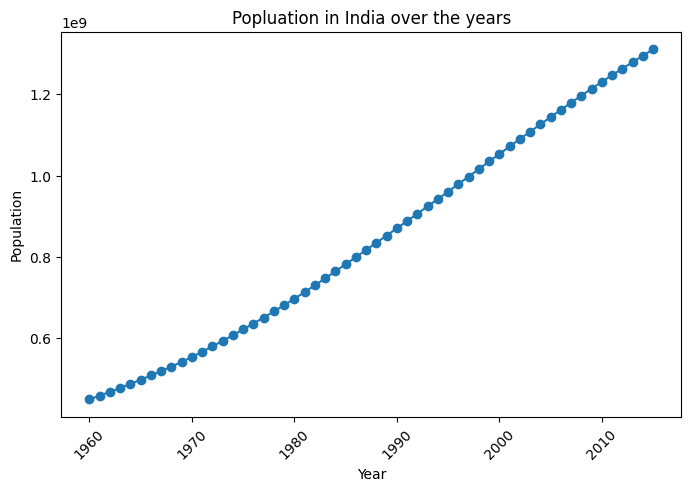

In [ ]:
# Create a line plot showing the population trend of a specific country over time using Matplotlib.

ds_country=ds[ds["country"]=="India"]

plt.figure(figsize=(8,5))
plt.plot(ds_country["year"], ds_country["Population"], marker="o", linestyle="-")

plt.title("Popluation in India over the years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.show()

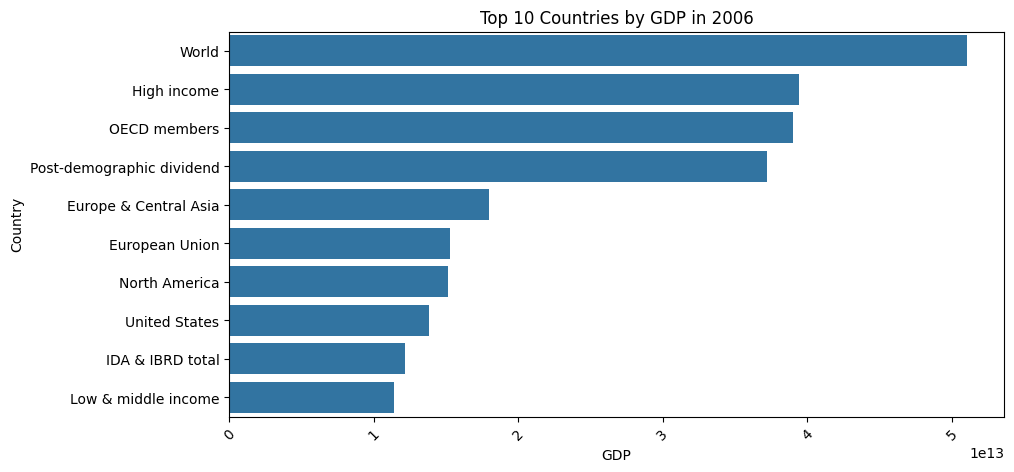

In [ ]:
# Generate a bar chart comparing the GDP of multiple countries in a given year using Seaborn.

ds_year = ds[ds['year'] == 2006].nlargest(10, 'GDP')
plt.figure(figsize=(10,5))
sns.barplot(x='GDP', y='country', data=ds_year)
plt.xlabel("GDP")
plt.ylabel("Country")
plt.title("Top 10 Countries by GDP in 2006")
plt.xticks(rotation=45)
plt.show()

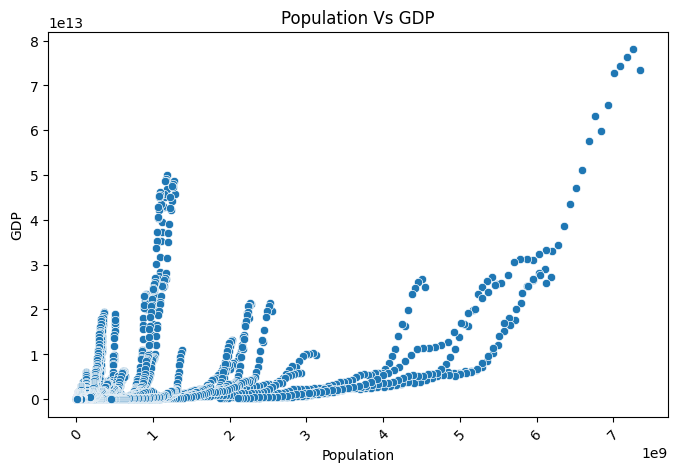

In [ ]:
# Create a scatter plot to visualize the relationship between population and GDP for different countries.

plt.figure(figsize=(8,5))
sns.scatterplot(x="Population", y="GDP", data=ds)
plt.title("Population Vs GDP")
plt.xlabel("Population")
plt.ylabel("GDP")
plt.xticks(rotation=45)
plt.show()

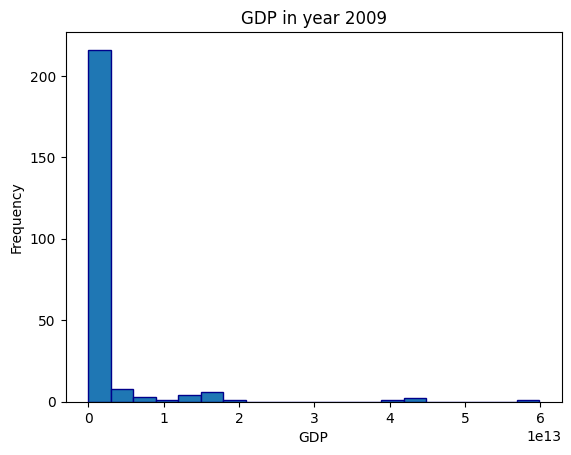

In [ ]:
# Use a histogram to show the distribution of GDP values across all countries in a specific year.

#plt.figure(figsize=(8,5))
year=ds[ds["year"]==2009]
year["GDP"].plot(kind="hist", bins=20, edgecolor="darkblue")
plt.title("GDP in year 2009")
plt.xlabel("GDP")
plt.show()

# We can see that most (>200) countries had the lowest GDP in 2009.

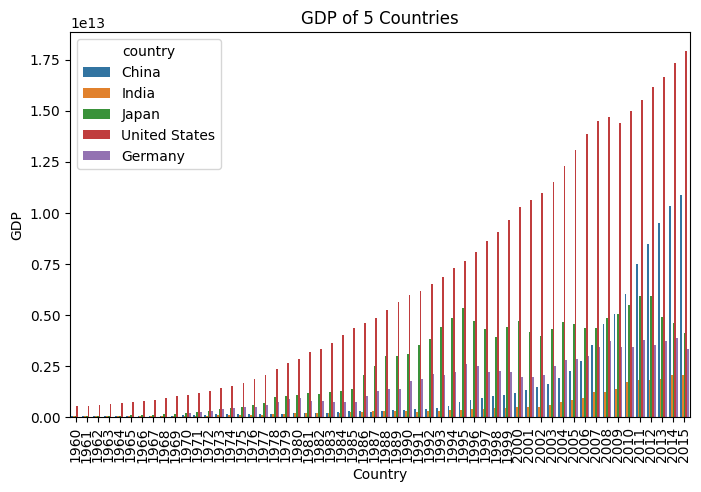

In [ ]:
# Plot a grouped bar chart comparing the GDP of five selected countries over the years.

top_countries = ["United States", "China", "India", "Germany", "Japan"]
ds_selected = ds[ds['country'].isin(top_countries)]

plt.figure(figsize=(8,5))
sns.barplot(x='year', y='GDP', hue='country', data=ds_selected)
plt.title("GDP of 5 Countries")
plt.xlabel("Country")
plt.ylabel("GDP")
plt.xticks(rotation=90)
plt.show()

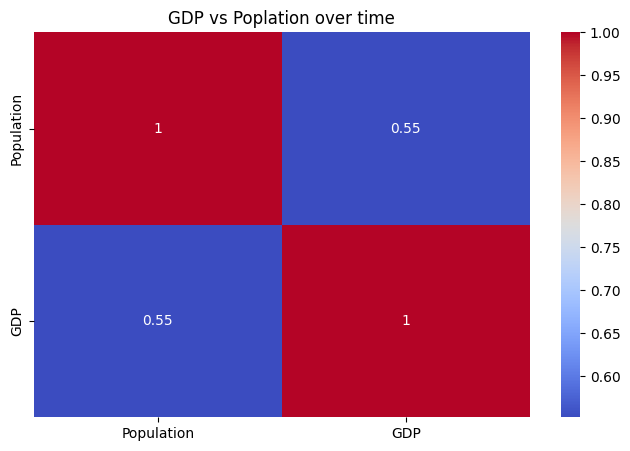

In [ ]:
# Create a heatmap to display the correlation between population and GDP over time.

corr_mat=ds[["Population","GDP"]].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")
plt.title("GDP vs Poplation over time")
plt.show()

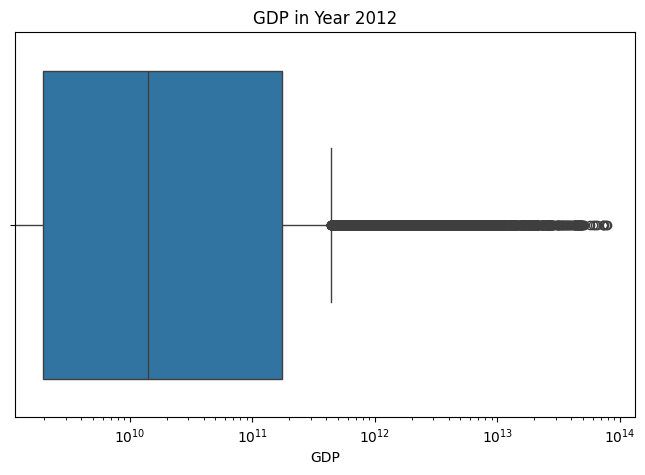

In [ ]:
# Implement a box plot to analyze GDP distribution across different countries in a single year.

plt.figure(figsize=(8,5))
sns.boxplot(x="GDP", data=ds)
plt.title("GDP in Year 2012")
plt.xlabel("GDP")
plt.xscale("log")
plt.show()

#??

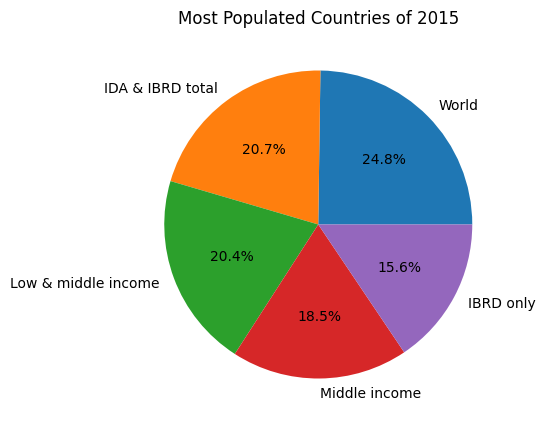

In [ ]:
# Use a pie chart to show the share of the world’s population held by the top five most populated countries in a given year.

ds_top=ds[ds["year"]==2007].nlargest(5,"Population")
plt.figure(figsize=(8,5))
plt.pie(ds_top["Population"], labels=ds_top["country"],autopct="%1.1f%%")
plt.title("Most Populated Countries of 2015")
plt.show()

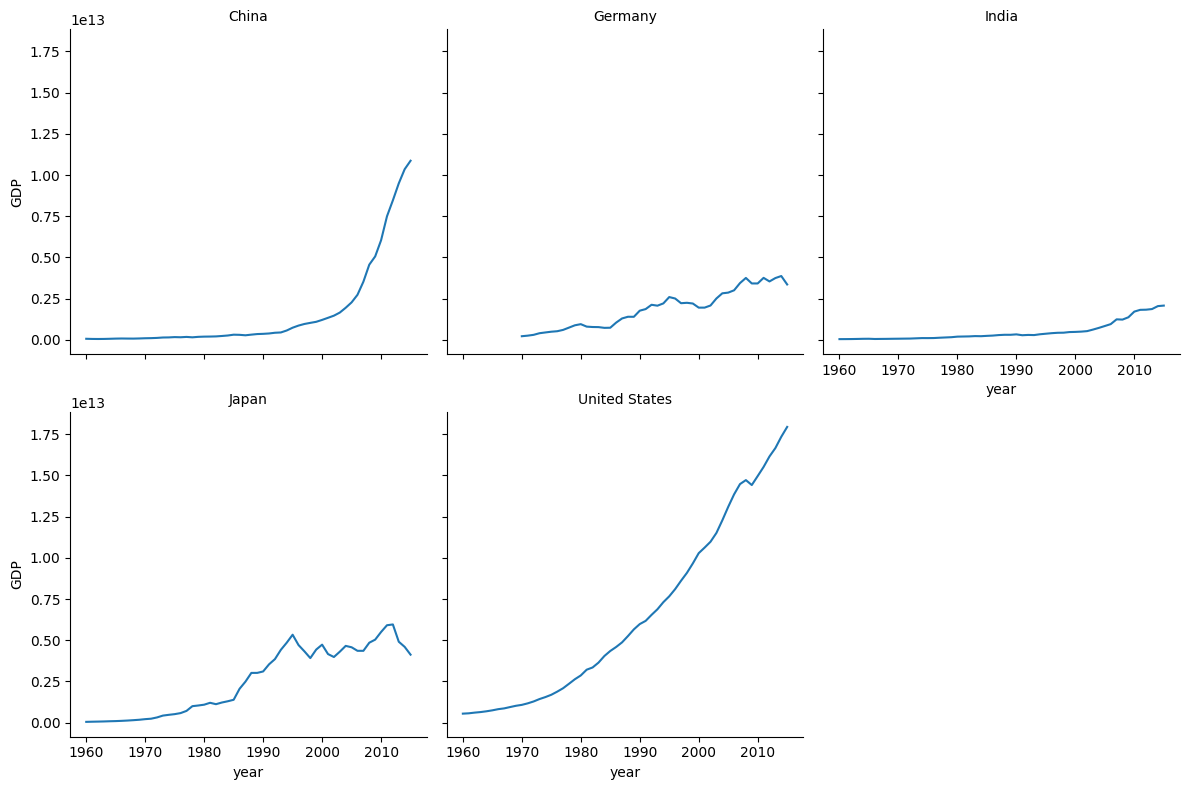

In [ ]:
# Create a FacetGrid in Seaborn to visualize GDP trends for multiple countries in separate plots.

top_countries = ["United States", "China", "India", "Germany", "Japan"]
ds_selected = ds[ds['country'].isin(top_countries)]

g = sns.FacetGrid(ds_selected, col='country', col_wrap=3, height=4)
g.map(sns.lineplot, 'year', 'GDP')
g.set_titles("{col_name}")
plt.show()


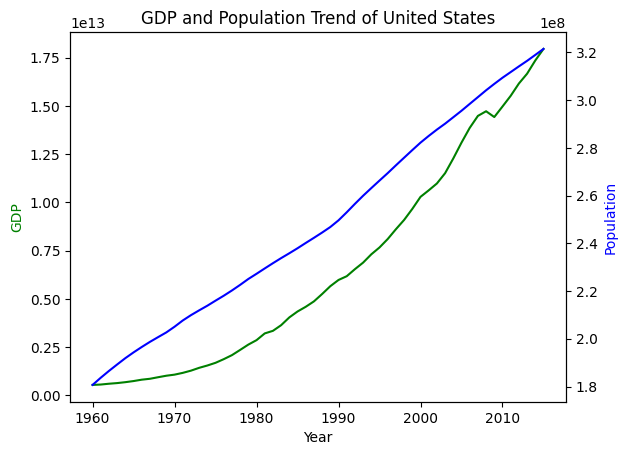

In [ ]:
# Implement a dual-axis plot to visualize both GDP and population trends for a country.

country = "United States"
ds_country = ds[ds['country'] == country]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(ds_country['year'], ds_country['GDP'], 'g-')
ax2.plot(ds_country['year'], ds_country['Population'], 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='g')
ax2.set_ylabel('Population', color='b')
plt.title(f"GDP and Population Trend of {country}")
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


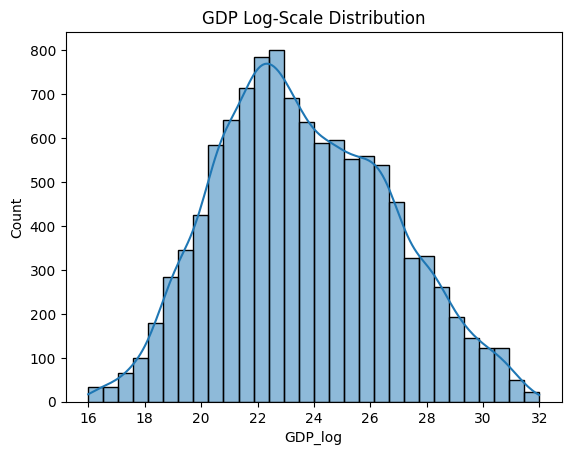

In [ ]:
# Use a log scale on the GDP axis to make large disparities more interpretable.

ds['GDP_log'] = np.log(ds['GDP'])
sns.histplot(ds['GDP_log'], bins=30, kde=True)
plt.title("GDP Log-Scale Distribution")
plt.show()

In [ ]:
# Animate a scatter plot showing the progression of GDP and population over time using Matplotlib.

import plotly.express as px
fig = px.scatter(ds, x='Population', y='GDP', animation_frame='year', color='country', size='GDP', log_x=True, log_y=True)
fig.show()

In [ ]:
# Create an interactive dashboard using Plotly to explore population and GDP trends.

fig = px.line(ds, x='year', y='GDP', color='country', title='GDP Trend Over Time')
fig.show()


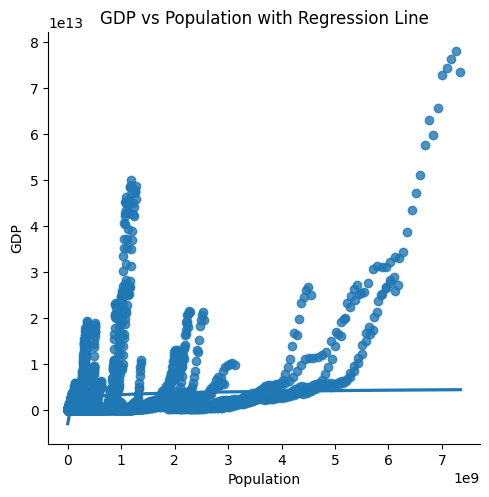

In [ ]:
# Apply a regression line to a scatter plot to analyze the relationship between GDP and population.

sns.lmplot(x='Population', y='GDP', data=ds, logx=True)
plt.title("GDP vs Population with Regression Line")
plt.show()